In [39]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
import numpy as np
import random as rd
import statistics as st
from scipy.optimize import curve_fit
from math import factorial
import scipy.stats as stats
import seaborn as sns
import copy
import matplotlib.colors as colors

import time

save_graph = True

import pandas as pd
import matplotlib.pyplot as plt

creazione del grafo

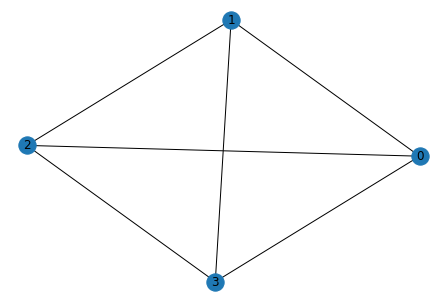

In [40]:
N=4
G = nx.complete_graph(N)
nodes = sorted([int(n) for n in G.nodes])
nx.draw(G, with_labels=True)    

analisi spettrale del grafo iniziale

In [41]:
adjacency = list(G.adjacency())
A = []
for a, b in adjacency :
    A += [[0]*len(adjacency)]

for a, b in adjacency :
    a = int(a)
    for c in b :
        c = int(c)
        A[a][c] = 1
print(A)

k_0 = [0]*N

for n in range(N):
    k_0[n]+=sum(A[n])

#matrice stocastica e calcolo autovettori e autovalori        
P = []
for a, b in adjacency :
    P += [[0]*len(adjacency)]
    for c in b: 
        P[a][c] = 1./G.degree[a] 
        
matrixP = np.array(P)
autovaloriP, autovettoriP = np.linalg.eig(np.transpose(matrixP))
autovettoriP = np.transpose(autovettoriP)

diff = [np.abs(autovaloriP[i] - 1) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriP[i] - 1) == minDiff:
        pS = autovettoriP[i]
        print("Eigenvector found")
        break

if pS[0] < 0:
    pS = -pS

[[0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]
Eigenvector found


In [42]:
matrixL = np.identity(N) - matrixP

autovaloriL, autovettoriL = np.linalg.eig(np.transpose(matrixL))
autovettoriL = np.transpose(autovettoriL)

diff = [np.abs(autovaloriL[i]) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriL[i]) == minDiff:
        pS_L = autovettoriL[i]
        FiedlerEigenvalues = list(autovaloriL)
        FiedlerEigenvalues.remove(autovaloriL[i])
        print("Eigenvector found")
        break

if pS_L[0] < 0:
    pS_L = -pS_L

pSNorm = [h/sum(pS) for h in pS]

Eigenvector found


random walk iniziale

In [43]:
seed = np.random.RandomState()
def dynamic_evolution(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            new_node = _random_subset(neighbours, 1, seed).pop()
            evolution[int(new_node)] += 1
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[int(n)]
    history += [evolution]

In [46]:
walker_per_node = 5000
time_steps = int(50)

long_history = [[]]
for h in range(len(long_history)):
    long_history[h] = [[walker_per_node] * len(G.nodes)]

In [47]:
t0 = time.time()

for h in range(len(long_history)):
    for n in G.nodes:
        G.nodes[n]['N_i'] = walker_per_node
    
    for t in range(time_steps):
        dynamic_evolution(G, long_history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 12.702339887619019 seconds


rimozione di un link

[0, 1]


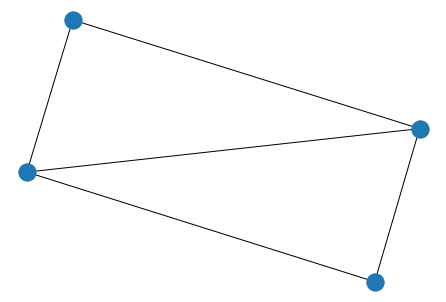

In [48]:
links = list(_random_subset(G.nodes, 2, seed))
print(links)
G.remove_edge(links[0], links[1])

nx.draw(G)


In [ ]:
adjacency_r = list(G.adjacency())
A_r = []
for a, b in adjacency_r :
    A_r += [[0]*len(adjacency_r)]

for a, b in adjacency_r :
    a = int(a)
    for c in b :
        c = int(c)
        A_r[a][c] = 1
print(A_r)

k_r = [0]*N

for n in range(N):
    k_r[n]+=sum(A_r[n])
print(k_r)

In [75]:
for n in range(N):
    k_r[n]+=sum(A_r[n])

#matrice stocastica e calcolo autovettori e autovalori        
P_r = []
for a, b in adjacency_r :
    P_r += [[0]*len(adjacency_r)]
    for c in b: 
        P_r[a][c] = 1./G.degree[a] 
        
matrixP_r = np.array(P_r)
autovaloriP_r, autovettoriP_r = np.linalg.eig(np.transpose(matrixP_r))
autovettoriP_r = np.transpose(autovettoriP_r)

diff = [np.abs(autovaloriP_r[i] - 1) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriP_r[i] - 1) == minDiff:
        pS_r = autovettoriP_r[i]
        print("Eigenvector found")
        break

if pS_r[0] < 0:
    pS_r = -pS_r

Eigenvector found


In [77]:
matrixL_r = np.identity(N) - matrixP_r

autovaloriL_r, autovettoriL_r = np.linalg.eig(np.transpose(matrixL_r))
autovettoriL_r = np.transpose(autovettoriL_r)

diff = [np.abs(autovaloriL_r[i]) for i in range(N)]
minDiff = min(diff)
for i in range(N):
    if np.abs(autovaloriL_r[i]) == minDiff:
        pS_L_r = autovettoriL_r[i]
        FiedlerEigenvalues_r = list(autovaloriL)
        FiedlerEigenvalues_r.remove(autovaloriL[i])
        print("Eigenvector found")
        break

if pS_L_r[0] < 0:
    pS_L_r = -pS_Lv

pSNorm_r = [h/sum(pS) for h in pS]

Eigenvector found


dinamica non ottimizzata dopo la rottura

In [50]:
t0 = time.time()

for h in range(len(long_history)):    
    for t in range(time_steps):
        dynamic_evolution(G, long_history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 13.108795166015625 seconds


dinamica ottimizzata - metropolis

In [70]:
seed = np.random.RandomState()
def dynamic_evolution_metropolis(G, history = []):
    evolution = [0] * len(G.nodes)
    for n in G.nodes:
        for i in range(G.nodes[n]['N_i']):
            neighbours = list(G[n])
            
            f_i = k_0[n]/k_r[n]
            #f_j = [k_0[n]/k_r[n] for n in neighbours]
            #p_ij = [min(1,f_j[n]/f_i) for n in neighbours]
            
            new_node = _random_subset(neighbours, 1, seed).pop()
            
            f_j = k_0[new_node]/k_r[new_node]
            
            p_ij = min(1,f_j/f_i)
            if rd.random() <= p_ij:
                evolution[int(new_node)] += 1  
            else:
                evolution[n] += 1
            
    for n in G.nodes:
        G.nodes[n]['N_i'] = evolution[int(n)]
    history += [evolution]

dinamica ottimizzata

In [71]:
t0 = time.time()

for h in range(len(long_history)):    
    for t in range(time_steps):
        dynamic_evolution_metropolis(G, long_history[h])

print(f"done in {int((time.time()-t0)/60)} minutes and {((time.time()-t0)%60)} seconds")

done in 0 minutes and 12.655667066574097 seconds


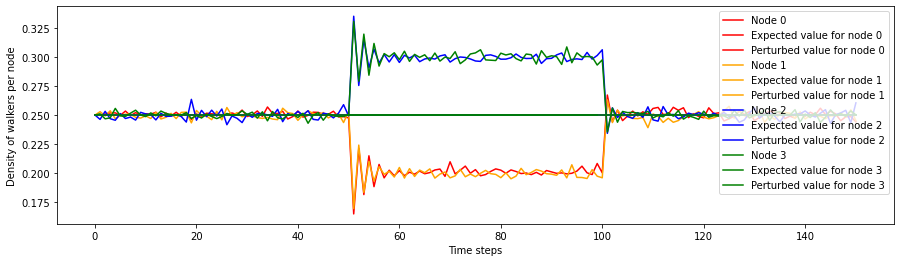

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(15, 4))
node = [0,1,2,3]
color = ['red', 'orange', 'blue', 'green']

time_range = long_history[0]
index = np.arange(0, len(time_range), 1)
index2 = np.arange(time_steps, 2*time_steps, 1)

col = 0
for i in node:
    ax.plot(index, [time_range[ind][i]/walker_per_node/N for ind in index], label = f"Node {i}", color = color[col])
    ax.plot(index, [pSNorm[i]]*len(index), label = f"Expected value for node {i}", color = color[col])
    ax.plot(index2, [pSNorm_r[i]]*len(index2), label = f"Perturbed value for node {i}", color = color[col])
    
#     index2 = np.arange(2*time_steps, 3*time_steps, 5)
#     ax.plot(index2, [time_range[ind][i]/walker_per_node/N for ind in index2], label = f"Node {i}", color = color[col])

    col += 1
    
ax.set_xlabel("Time steps")
ax.set_ylabel("Density of walkers per node")
ax.legend()

plt.show()